In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis import *
import matplotlib as mpl
from matplotlib import cm
from scipy import optimize
mpl.rcParams['axes.linewidth'] = 1.4
Z=20
import pandas as pd
from scipy.stats import spearmanr, kendalltau, pearsonr
import math
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import train_test_split
import random

In [2]:
#EXP=Affinity constant, std, ranking
EXP = {"N8A20": [0, 0],
      "N14A20": [0, 0],
      "N9A20" : [0, 0],
      "N6A21" : [0, 0],
      "N1A16" : [0, 0],
      "N1A17" : [0, 0],
      "N3A10" : [0, 0],
      "N3A11" : [0, 0],
      "N3A18" : [0, 0],
      "N6A20" : [120, 5],
      "N15A20": [300, 0],
      "N7A20" : [1100, 0],
      "N16A20": [4.5*10**4, 0],
      "N13A20": [5.0*10**4, 0],
      "N2A11" : [8.5*10**4, 1.5*10**4],
      "N2A10" : [9.3*10**4, 1.2*10**4],
      "N1A9"  : [1.2*10**5, 0.2*10**5],
      "N1A8"  : [1.3*10**5, 0.2*10**5],
      "N1A7"  : [2.6*10**5, 0.6*10**5],
      "N1A13" : [2.7*10**5, 0.3*10**5],
      "N1A1"  : [3.6*10**5, 0],
      "N3A19" : [3.6*10**5, 0.1*10**5],
      "N1A15" : [3.7*10**5, 0],
      "N1A12" : [3.9*10**5, 0.3*10**5],
      "N1A10" : [4.1*10**5, 0.4*10**5],
      "N1A14" : [4.6*10**5, 0],
      "N1A11" : [4.8*10**5, 0.5*10**5],
      "N2A18" : [5.1*10**5, 0.3*10**5],   
      "N1A18" : [6.1*10**5, 1.4*10**5],
      "N2A19" : [1.3*10**6, 0.1*10**6],
      "N1A19" : [2.2*10**6, 0.1*10**6],
      }

NP_lonepairs = {1:7, 2:9, 3:9, 5:14, 6:8, 7:8, 8:10, 9:10, 10:8, 11:8, 12:10, 13:8, 14:10, 15:8, 16:0}
NP_hydrogens = {1:0, 2:1, 3:1, 5:1, 6:1, 7:2, 6:1, 7:2, 8:1, 9:2, 10:0, 11:0, 12:2, 13:3, 14:1, 15:1, 16:3}
AN_lonepairs = {1:0, 6:0, 7:0, 8:2, 9:4, 10:2, 11:2, 12:4, 13:2, 14:5, 15:2, 16:5, 17:7, 18:0, 19:0, 20:7, 21:6}
AN_hydrogens = {1:3, 6:2, 7:4, 8:4, 9:5, 10:3, 11:3, 12:3, 13:5, 14:3, 15:3, 16:3, 17:1, 18:3, 19:3, 20:1, 21:1} #Fluors were included

Ns = [int(key.split('A')[0].split("N")[1]) for key in EXP.keys()]
As = [int(key.split('A')[1]) for key in EXP.keys()]
Systems = ["N{}A{}".format(n,a) for n,a in zip(Ns, As)]
act_mean = [EXP["N{}A{}".format(n, a)][0] for n, a in zip(Ns, As)]
act_std = [EXP["N{}A{}".format(n, a)][1] for n, a in zip(Ns, As)]
act_rank = np.argsort(-1*np.array(act_mean))
nano_lonepairs = [NP_lonepairs[n] for n in Ns]
nano_hydrogens = [NP_hydrogens[n] for n in Ns]
ana_lonepairs = [AN_lonepairs[a] for a in As]
ana_hydrogens = [AN_hydrogens[a] for a in As]
colors = np.round(cm.rainbow(np.linspace(0, 1, len(Ns))), 2)
colnames = ['Nanoparticle', 'Analyte', 'Act_Mean', 'Act_Std', 'Act_Rank', 'NP_Acceptors', 'NP_Donors', 'AN_Acceptors', 'AN_Donors', 'Color']
DATA = pd.DataFrame(zip(Ns, As, act_mean, act_std, act_rank, nano_lonepairs, nano_hydrogens, ana_lonepairs, ana_hydrogens, colors), columns=colnames, index=Systems)
DATA.index.name = "System"
print(len(EXP))

31


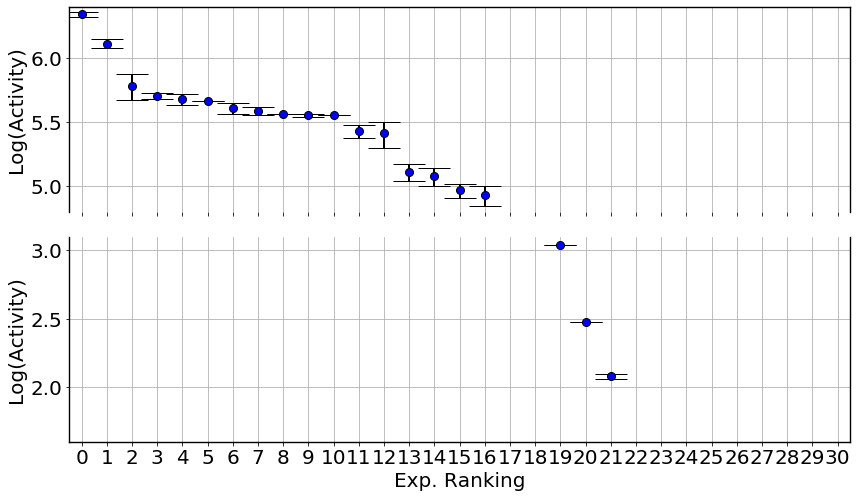

In [3]:
act_means = DATA.Act_Mean.values*1
act_means[act_means==0] = 1.0
act_stds = DATA.Act_Std.values*1
log_means = np.log10(act_means)
DATA['Act_log'] = log_means
err_up = np.log10(act_means+act_stds) - np.log10(act_means)
err_down = np.log10(act_means) - np.log10(act_means-act_stds)
error = np.array([err_down, err_up])
DATA['Act_log_error_up'] = err_up
DATA['Act_log_error_down'] = err_down

subplot_kw={'xlim':(-0.5, max(DATA.Act_Rank)+0.5), 'xticks':np.linspace(0,max(DATA.Act_Rank), max(DATA.Act_Rank)+1)}
fig, axs = plt.subplots(figsize=(14,8), sharex=True, ncols=1, nrows=2, subplot_kw=subplot_kw, gridspec_kw={'hspace':0.12, 'wspace':0.0})
plt.xlabel("Log(Binding constant)", fontsize=Z)
for ax in axs:
    ax.grid()
    ax.set_ylabel("Log(Activity)", fontsize=Z)
    ax.tick_params(labelsize=Z)
    ax.errorbar(DATA.Act_Rank, DATA.Act_log, yerr=error, fmt='o', capsize=16, markeredgecolor='k', markeredgewidth=1, markerfacecolor='b', markersize=8, linewidth=2, color='k')
axs[0].set_ylim(4.8,6.4)
axs[0].spines['bottom'].set_visible(False)
axs[1].set_ylim(1.6,3.1)
axs[1].spines['top'].set_visible(False)
axs[-1].set_xlabel("Exp. Ranking", fontsize=Z)
plt.show()
plt.close()

In [4]:
Act_Rank_Std_up = []
Act_Rank_Std_down = []
N = len(DATA)
n_act = np.sum(DATA.Act_Mean > 0.0)
for i in range(N):
    lower_than = np.sum((DATA.Act_Mean[i] + DATA.Act_Std[i]) >= (DATA.Act_Mean[i:]-DATA.Act_Std[i:]))-1 #-1 to not count itself
    Act_Rank_Std_up.append(lower_than)
    greater_than = np.sum((DATA.Act_Mean[i] - DATA.Act_Std[i]) <= (DATA.Act_Mean[:i]+DATA.Act_Std[:i])) #-1 is absent because of slicing open/closed limits
    Act_Rank_Std_down.append(greater_than)
Act_Rank_Std_up = np.array(Act_Rank_Std_up)
DATA['Act_Rank_Std_up'] = Act_Rank_Std_up*1
DATA['Act_Rank_Std_down'] = Act_Rank_Std_down*1
DATA['Act_Rank_Std_up'].loc[DATA.Act_Mean==0.0] = DATA['Act_Rank_Std_down'].loc[DATA.Act_Mean==0.0]*1
DATA['Act_Rank_Std_down'].loc[DATA.Act_Mean==0.0] = Act_Rank_Std_up[DATA.Act_Mean==0.0]*1

DATA = DATA[['Nanoparticle', 'Analyte', 'Act_Mean', 'Act_Std', 'Act_Rank', 'Act_Rank_Std_up', 'Act_Rank_Std_down', 'Act_log', 'Act_log_error_up', 'Act_log_error_down', 'Color']]
#print(DATA.head())
#print(DATA.tail())
print(DATA[['Act_Mean', 'Act_Rank', 'Act_Rank_Std_up', 'Act_Rank_Std_down', 'Act_log', 'Act_log_error_up', 'Act_log_error_down']])

         Act_Mean  Act_Rank  Act_Rank_Std_up  Act_Rank_Std_down   Act_log  \
System                                                                      
N8A20         0.0        30                0                  8  0.000000   
N14A20        0.0        29                1                  7  0.000000   
N9A20         0.0        28                2                  6  0.000000   
N6A21         0.0        27                3                  5  0.000000   
N1A16         0.0        26                4                  4  0.000000   
N1A17         0.0        25                5                  3  0.000000   
N3A10         0.0        24                6                  2  0.000000   
N3A11         0.0        23                7                  1  0.000000   
N3A18         0.0        22                8                  0  0.000000   
N6A20       120.0        21                0                  0  2.079181   
N15A20      300.0        20                0                  0  2.477121   

C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
def read_text_file(fname):
    f = open(fname, "r")
    fl = f.readlines()
    f.close()
    
    data = []
    for line in fl:
        if "#" not in line and "@" not in line:
            data.append(line.split())
    clean = np.array(data, dtype='float')
    return clean

def ma(data, n_window):
    cumsum, moving_aves = [0], []

    for i, x in enumerate(data, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>n_window:
            moving_ave = (cumsum[i] - cumsum[i-n_window])/n_window
            moving_aves.append(moving_ave)
    moving_aves = np.array(moving_aves)
    return moving_aves

def consensed_rank(predicted_ranks):
    n_vals = len(predicted_ranks[0])
    predicted_ranks = np.array(predicted_ranks)
    mean_ranks = []
    for i in range(n_vals-1,-1,-1):
        ndxs = np.where(predicted_ranks == i)
        mean_rank = np.mean(ndxs[1])
        mean_ranks.append(mean_rank)
    mean_ranks = np.array(mean_ranks)
    #mean_ranks has the average ranking (i.e. floats). The next code ranks them according to their mean ranking
    temp = mean_ranks.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(mean_ranks))
    return ranks
    #return mean_ranks
    
def alfacalc(x, important_perc):
    return np.exp(-x*important_perc/100)-0.8*np.exp(-x)-0.2

def alfacalc_temp(x, T_max, important_T):
    return np.exp(-x*important_T) - 0.8*np.exp(-x*T_max) - 0.2

def RIE(alfa, n, N, metric):
    const = n/N*((1-np.exp(-alfa))/(np.exp(alfa/N)-1))
    met_argsort = np.argsort(-1*metric)
    active_slots = np.where(met_argsort < n)[0]
    xi = (active_slots+1)/N
    imp = np.sum(np.exp(-alfa*xi))
    rie = imp/const
    return rie

def BEDROC(metric, important_perc=30, df=DATA):
    #Metric must follow the premise: The lowest the more active!!!!
    N = len(df)
    n = (df.Act_Mean > 0).sum()

    #important_perc = n/N*100
    alfa = optimize.brentq(alfacalc, 0.0001, 1000000, args=(important_perc))
    rie = RIE(alfa, n, N, metric)
    
    ra = n/N
    rie_min = (1-np.exp(alfa*ra))/(ra*(1-np.exp(alfa)))
    rie_max = (1-np.exp(-alfa*ra))/(ra*(1-np.exp(-alfa)))
    bedroc = (rie-rie_min)/(rie_max-rie_min)
    return bedroc

def confusion_matrix(metric, df=DATA):
    N = len(df)
    n = (df.Act_Mean > 0).sum()
    met_argsort = np.argsort(metric)
    tp = np.sum(met_argsort[:n] >= N-n)
    fp = np.sum(met_argsort[:n] < N-n)
    fn = np.sum(met_argsort[n:] >= N-n)
    tn = np.sum(met_argsort[n:] < N-n)
    matrix_abs = np.array([[tp, fp], [fn, tn]])
    
    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    fnr = fn/(fn + tp)
    tnr = tn/(tn + fp)
    matrix_rel = np.array([[tpr, fpr], [fnr, tnr]])
    return matrix_abs, matrix_rel

conf_colors = [(0,0,0.6), (0.8,0,0), (1,0.4,0.6), (0,0.6,1)]
conf_abs_labels = ["TP", "FP", "FN", "TN"]
conf_rel_labels = ["TPR", "FPR", "FNR", "TNR"]

chis = np.linspace(0.5, 60, 12)
c_chis = cm.magma(np.linspace(0.25,1,len(chis)))

In [6]:
def plot_ranking(xdata=None, metric=None, args=None, yaxis="rank", reverse_metric=False,
                xlabel="Predicted", ylabel=None, title=None,
                grid=False, xlim=(-0.5,N-0.5), ylim=None,
                xticks=np.arange(0,N, 2, dtype='int'), xtl=np.arange(0,N, 2, dtype='int'),
                yticks=None, ytl=None, 
                fmt='o', capsize=8, mec='k', mew=1, lw=1, lc='k', ms=8,
                tight=False, leg=True, loc='best',
                pane_color='k', pane_alpha=0.3,
                line_color='k', line_width=0.5, line_alpha=0.8,
                a=None, df=DATA):
    if type(xdata) == type(None):
        met = metric(*args)
        if reverse_metric:
            met = -1*met
        xdata = np.argsort(met)
    if yaxis == 'rank':
        ydata = df.Act_Rank*1
        yerr = df[['Act_Rank_Std_down', 'Act_Rank_Std_up']].values*1
        if ylabel == None:
            ylabel = "Experimental"
        if ylim == None:
            ylim = (-0.5, N-0.5)
        if yticks == None:
            yticks = np.arange(0,N, 2, dtype='int')
        if ytl == None:
            ytl = np.arange(0,N, 2, dtype='int')
    elif yaxis == 'act_rank':
        ydata = df.Act_Rank*1
        yerr = df[['Act_Rank_Std_down', 'Act_Rank_Std_up']].values*1
        if ylabel == None:
            ylabel = "Experimental"
        if ylim == None:
            ylim = (-0.5, N-0.5)
        if yticks == None:
            yticks = np.arange(0,N, 2, dtype='int')
        if ytl == None:
            ytl = np.array2string(df.Act_Mean[::2].values, separator=" ")[1:-1].split()
            ytl.reverse()
    elif yaxis == 'act':
        ydata = df.Act_Mean*1
        yerr = df.Act_Std*1
        if ylabel == None:
            ylabel = "Binding constant"
        if ylim == None:
            ylim = (df.Act_Mean.min(), df.Act_Mean.max()+df.Act_Std.max())
        if yticks == None:
            yticks = np.linspace(df.Act_Mean.min(), df.Act_Mean.max()+df.Act_Std.max(), N//2)
        if ytl == None:
            ytl = yticks*1
    elif yaxis == 'logact':
        ydata = df.Act_log*1
        yerr = df[['Act_log_error_down', 'Act_log_error_up']].values*1
        ymin = df.Act_log.min()-1
        ymax = math.ceil(df.Act_log.max()+df.Act_log_error_up.max())
        if ylabel == None:
            ylabel = "Log(Binding constant)"
        if ylim == None:
            ylim = (ymin,ymax)
        if yticks == None:
            yticks = np.linspace(ymin, ymax, ymax-ymin+1, dtype='int')
        if ytl == None:
            ytl = yticks*1
    rho, p_rho = spearmanr(df.Act_Rank, xdata)
    
    if a == None:
        a = plt.axes()
    a.set_xlim(xlim)
    a.set_ylim(ylim)
    a.set_xticks(xticks)
    a.set_yticks(yticks)
    a.set_xticklabels(xtl)
    a.set_yticklabels(ytl)
    a.tick_params(labelsize=Z)
    a.set_title(title, fontsize=Z)
    a.set_xlabel(xlabel, fontsize=Z)
    a.set_ylabel(ylabel, fontsize=Z)
    a.plot([], [], lw=3, c='k', label=r"$\rho$={:.2f}".format(rho))
    for pred_av, exp, exp_std, c in zip(xdata, ydata, yerr, df['Color']):
        #a.errorbar([pred_av], [exp], yerr=np.array([exp_std]).T, xerr=[pred_std], fmt=fmt, capsize=capsize, markeredgecolor=mec, markeredgewidth=mew, markerfacecolor=c, markersize=ms, linewidth=lw, color=lc
        a.errorbar([pred_av], [exp], yerr=np.array([exp_std]).T, fmt=fmt, capsize=capsize, markeredgecolor=mec, markeredgewidth=mew, markerfacecolor=c, markersize=ms, linewidth=lw, color=lc)

    a.axvline(n_act, c=line_color, lw=line_width, alpha=line_alpha)
    if yaxis == 'rank':
        a.fill_between([n_act, N], [N,N], [n_act, n_act], color=pane_color, alpha=pane_alpha)
        a.axhline(n_act, c=line_color, lw=line_width, alpha=line_alpha)
    if yaxis == 'act':
        a.yaxis.set_major_formatter(FormatStrFormatter('%.2E'))
        
    if grid:
        a.grid()
    if leg:
        a.legend(fontsize=Z, loc=loc)
    return a

In [7]:
def plot_metric(metric, xdata, args, reverse_metric=False,
                a1=None, a2=None, a3=None, a4=None,
                
                xlim1=None, xticks1=None, xlabel1="Free parameter", xtl1=None,
                ylim1=None, yticks1=None, ylabel1="Sorting\nmetric", ytl1=None,
                title1="", grid1=False, chi_show=30, a1fmty="%.1f", a1fmtx="%.1f",
                
                xlim2=None, xticks2=None, xlabel2="Free parameter", xtl2=None,
                ylim2=(-0.05,1.05), yticks2=np.arange(0.2,1.1,0.2), ylabel2="BEDROC", ytl2=np.arange(0.2,1.1,0.2),
                title2="", grid2=False, leg2=True, loc2='best', a2fmty="%.1f", a2fmtx="%.1f",
                
                xlim3=None, xticks3=None, xlabel3="Free parameter", xtl3=None,
                ylim3=(-0.05,1.05), yticks3=np.arange(0.2,1.1,0.2), ylabel3="Corr.\ncoefficient", ytl3=np.arange(0.2,1.1,0.2),
                title3="", grid3=False, leg3=True, loc3='best', a3fmty="%.1f", a3fmtx="%.1f",
                
                xlim4=None, xticks4=None, xlabel4="Free parameter", xtl4=None,
                ylim4=(-0.05, 1.05), yticks4=np.arange(0.2,1.1,0.2), ylabel4="Fraction", ytl4=np.arange(0.2,1.1,0.2),
                title4="", grid4=False, leg4=True, loc4='best', a4fmty="%.1f", a4fmtx="%.1f",
               df=DATA):
    
    ###It requries for the metric function to take xdata as first parameter!
    ydata = []
    bedrocs = []
    rhos, p_rhos = [], []
    taus, p_taus = [], []
    pearsons, p_pearsons = [], []
    conf_mats_abs, conf_mats_rel = [], []
    for xpt in xdata:
        ypt = metric(xpt, *args)
        if reverse_metric:
            ypt = ypt*-1
        ydata.append(ypt)
        bedroc_tmp = []
        for chi in chis:
            bedroc = BEDROC(ypt, important_perc=chi)
            bedroc_tmp.append(bedroc)
        bedrocs.append(bedroc_tmp)
        rho, p_rho = spearmanr(df.Act_Rank, ypt)
        rhos.append(rho)
        p_rhos.append(p_rho)
        tau, p_tau = kendalltau(df.Act_Rank, ypt)
        taus.append(tau)
        p_taus.append(p_tau)
        pearson, p_pearson = pearsonr(df.Act_Rank, np.argsort(ypt))
        pearsons.append(pearson)
        p_pearsons.append(p_pearson)
        conf_mat = confusion_matrix(ypt)
        conf_mats_abs.append(conf_mat[0])
        conf_mats_rel.append(conf_mat[1])
    bedrocs = np.array(bedrocs).T
    ydata = np.array(ydata)
    rhos, p_rhos = np.array(rhos), np.array(p_rhos)
    taus, p_taus = np.array(taus), np.array(p_taus)
    pearsons, p_pearsons = np.array(pearsons), np.array(p_pearsons)
    ydata = ydata.T
    conf_mats_abs = np.array(conf_mats_abs).reshape((len(conf_mats_abs),4)).T
    conf_mats_rel = np.array(conf_mats_rel).reshape((len(conf_mats_rel),4)).T
  
    if np.any(xlim1 == None):
        xlim1 = (min(xdata), max(xdata))
    if np.any(xticks1 == None):
        xticks1 = [min(xdata), max(xdata)]
    if np.any(xtl1 == None):
        xtl1 = [min(xdata), max(xdata)]
    if np.any(ylim1 == None):
        ylim1 = (np.min(ydata), np.max(ydata))
    if np.any(yticks1 == None):
        yticks1 = [np.min(ydata), np.max(ydata)]
    if np.any(ytl1 == None):
        ytl1 = [np.min(ydata), np.max(ydata)]
    if a1 == None:
        a1 = plt.axes()
    a1.set_title(title1)
    a1.tick_params(labelsize=Z)
    a1.set_xlim(xlim1)
    a1.set_xticks(xticks1)
    a1.set_xticklabels(xtl1, fontsize=Z)
    a1.set_xlabel(xlabel1, fontsize=Z)
    a1.set_ylim(ylim1)
    a1.set_yticks(yticks1)
    a1.set_yticklabels(ytl1, fontsize=Z)
    a1.set_ylabel(ylabel1, fontsize=Z)
    a1.yaxis.set_major_formatter(FormatStrFormatter(a1fmty))
    if reverse_metric:
        ydata = ydata*-1
    for ypt, c in zip(ydata, colors):
        a1.plot(xdata, ypt, color=c, lw=1.5)
    a1sub = a1.twinx()
    a1sub.tick_params(labelsize=Z)
    a1sub.set_ylabel("BEDROC", fontsize=Z)
    a1sub.set_ylim(0,1)
    a1sub.set_yticks(ytl2) #The same as for a2
    a1sub.axhline(y=0.8, xmin=0, xmax=1, c='k', lw=2, ls=':')
    a1sub.plot(xdata, bedrocs[np.argmin(np.abs(chis-chi_show))], color='k', lw=2, zorder=1)
    if grid1:
        a1.grid()
               
    if np.any(xlim2 == None):
        xlim2 = (min(xdata), max(xdata))
    if np.any(xticks2 == None):
        xticks2 = [min(xdata), max(xdata)]
    if np.any(xtl2 == None):
        xtl2 = [min(xdata), max(xdata)]
    if a2 == None:
        a2 = plt.axes()
    a2.set_title(title2)
    a2.tick_params(labelsize=Z)
    a2.set_xlim(xlim2)
    a2.set_xticks(xticks2)
    a2.set_xticklabels(xtl2, fontsize=Z)
    a2.set_xlabel(xlabel2, fontsize=Z)
    a2.set_ylim(ylim2)
    a2.set_yticks(yticks2)
    a2.set_yticklabels(ytl2, fontsize=Z)
    a2.set_ylabel(ylabel2, fontsize=Z)
    a2.yaxis.set_major_formatter(FormatStrFormatter(a2fmty))
    a2.axhline(y=0.8, xmin=0, xmax=1, c='k', lw=2, ls=':')
    for bedroc, c, chi in zip(bedrocs, c_chis, chis):
        a2.plot(xdata, bedroc, c=c, lw=2, label=r"$\chi=${:.0f}".format(chi))
    if grid2:
        a2.grid()
    if leg2:
        a2.legend(ncol=6, fontsize=Z-6, loc=loc2)
                   
    if np.any(xlim3 == None):
        xlim3 = (min(xdata), max(xdata))
    if np.any(xticks3 == None):
        xticks3 = [min(xdata), max(xdata)]
    if np.any(xtl3 == None):
        xtl3 = [min(xdata), max(xdata)]
    if a3 == None:
        a3 = plt.axes()
    a3.set_title(title3)
    a3.tick_params(labelsize=Z)
    a3.set_xlim(xlim3)
    a3.set_xticks(xticks3)
    a3.set_xticklabels(xtl3, fontsize=Z)
    a3.set_xlabel(xlabel3, fontsize=Z)
    a3.set_ylim(ylim3)
    a3.set_yticks(yticks3)
    a3.set_yticklabels(ytl3, fontsize=Z)
    a3.set_ylabel(ylabel3, fontsize=Z)
    a3.yaxis.set_major_formatter(FormatStrFormatter(a3fmty))
    a3.plot(xdata, rhos, c='b', lw=2, label=r"Spearman $\rho$")
    a3.plot(xdata, taus, c='orange', lw=2, label=r"Kendall $\tau$")
    a3.plot(xdata, pearsons, c='magenta', lw=2, label=r"Pearson $r$", zorder=1)
    if grid3:
        a3.grid()
    if leg3:
        a3.legend(fontsize=Z-6, loc=loc3)
               
    if np.any(xlim4 == None):
        xlim4 = (min(xdata), max(xdata))
    if np.any(xticks4 == None):
        xticks4 = [min(xdata), max(xdata)]
    if np.any(xtl4 == None):
        xtl4 = [min(xdata), max(xdata)]
    if a4 == None:
        a4 = plt.axes()
    a4.set_title(title4)
    a4.tick_params(labelsize=Z)
    a4.set_xlim(xlim4)
    a4.set_xticks(xticks4)
    a4.set_xticklabels(xtl4, fontsize=Z)
    a4.set_xlabel(xlabel4, fontsize=Z)
    a4.set_ylim(ylim4)
    a4.set_yticks(yticks4)
    a4.set_yticklabels(ytl4, fontsize=Z)
    a4.set_ylabel(ylabel4, fontsize=Z)
    a4.yaxis.set_major_formatter(FormatStrFormatter(a4fmty))
    for metric_rel, rel_lab, c in zip(conf_mats_rel, conf_rel_labels, conf_colors):
        a4.plot(xdata, metric_rel, label=rel_lab, c=c, ls='-', lw=2)
    if grid4:
        a4.grid()
    if leg4:
        a4.legend(fontsize=Z-6, loc=loc4)
    
    best_ndx = np.where(rhos==np.nanmax(rhos))[0]
    best_param = xdata[best_ndx[0]]
    print(r"rho({:.1f}) = {:.2f}".format(best_param, np.nanmax(rhos)))
    return (a1, a2, a3, a4)

In [8]:
S = [31, 32, 33]
distances = []
for s in S:
    print("S{}".format(s))
    distace_setup = []
    for NA in DATA.index:
        print("\t{}".format(NA))
        distance_run = read_text_file("./Mixtures/S{}/DISTS/{}S{}_NVT_dcom.sfu".format(s, NA, s))
        distace_setup.append(distance_run)
    distances.append(distace_setup)
distances = np.array(distances)
times = distances[0,0,:,0]
distances = distances[:,:,:,1:]*10
print(np.shape(times))
print(np.shape(distances))

S31
	N8A20
	N14A20
	N9A20
	N6A21
	N1A16
	N1A17
	N3A10
	N3A11
	N3A18
	N6A20
	N15A20
	N7A20
	N16A20
	N13A20
	N2A11
	N2A10
	N1A9
	N1A8
	N1A7
	N1A13
	N1A1
	N3A19
	N1A15
	N1A12
	N1A10
	N1A14
	N1A11
	N2A18
	N1A18
	N2A19
	N1A19
S32
	N8A20
	N14A20
	N9A20
	N6A21
	N1A16
	N1A17
	N3A10
	N3A11
	N3A18
	N6A20
	N15A20
	N7A20
	N16A20
	N13A20
	N2A11
	N2A10
	N1A9
	N1A8
	N1A7
	N1A13
	N1A1
	N3A19
	N1A15
	N1A12
	N1A10
	N1A14
	N1A11
	N2A18
	N1A18
	N2A19
	N1A19
S33
	N8A20
	N14A20
	N9A20
	N6A21
	N1A16
	N1A17
	N3A10
	N3A11
	N3A18
	N6A20
	N15A20
	N7A20
	N16A20
	N13A20
	N2A11
	N2A10
	N1A9
	N1A8
	N1A7
	N1A13
	N1A1
	N3A19
	N1A15
	N1A12
	N1A10
	N1A14
	N1A11
	N2A18
	N1A18
	N2A19
	N1A19
(2501,)
(3, 31, 2501, 10)


# Distance from the top to the COM

In [9]:
def find_block_distance_com(dist_thres, times, distances, block_size=1, ascending=True):
    """Calculates the times on which the block average distance of the block_size analytes farthest (or closest) to the core overpass 
    dist_thres. The shape of the distances is (n_systems, n_times, n_analytes)."""
    bye_times = []
    distances = np.sort(distances, axis=2)
    for distance in distances: #Iterates over systems
        if ascending:
            up_means = np.mean(distance[:,:block_size], axis=1)
        else:
            up_means = np.mean(distance[:,block_size:], axis=1)
        if np.sum(up_means>=dist_thres) == 0:
            bye_time = times[-1]
        else:
            bye_time = times[up_means>=dist_thres][0]
        bye_times.append(bye_time)
    bye_times = np.array(bye_times)
    return bye_times

def find_block_distance_com_b_consensed(dist_thres, times, distances, b_sizes, ascending=True):
    all_pred_ranks = []
    for b in b_sizes:
        bye_times = find_block_distance_com(dist_thres, times, distances, block_size=b, ascending=ascending)
        pred_rank = np.argsort(-1*bye_times)
        all_pred_ranks.append(pred_rank)
    y_pred = consensed_rank(all_pred_ranks)
    return y_pred

In [10]:
def train(ndx_train, ref_dists, b_sizes, ascending=True, distances=distances, df=DATA, figname="Test.png", plot=True):
    df_train = DATA.iloc[ndx_train]
    y_train = np.argsort(df_train.Act_Mean)

    b_size = np.linspace(1,10,10)
    dist_train = distances[ndx_train,:,:]
    rhos = []
    for ref_dist in ref_dists:
        rhos_tmp = []
        y_pred = find_block_distance_com_b_consensed(ref_dist, times, dist_train, b_sizes=b_sizes, ascending=ascending)
        rho, p_rho = spearmanr(y_train, y_pred)
        rhos.append(rho)
    rhos = np.array(rhos)
    best_rho = np.max(rhos)
    best_dist = ref_dists[np.where(rhos==best_rho)[0]][0]
    
    if plot:
        fig = plt.figure(figsize=(10,5))
        ax = plt.axes()
        ax.plot(ref_dists, rhos, lw=2, color='b', label=r"d={:.1f} A, $\rho$={:.2f}".format(best_dist, best_rho))
        ax.axvline(best_dist, lw=2, ls=":", color='b')
        ax.legend(fontsize=Z-4, loc='lower right')
        ax.set_xlabel("Divergence Criterium (A)", fontsize=Z)
        ax.set_ylabel(r"Spearman's $\rho$", fontsize=Z)
        ax.set_ylim(0,1)
        ax.tick_params(labelsize=Z)
        plt.tight_layout()
        plt.savefig(figname, format='png', dpi=300)
        plt.show()
        plt.close()
    
    return rhos

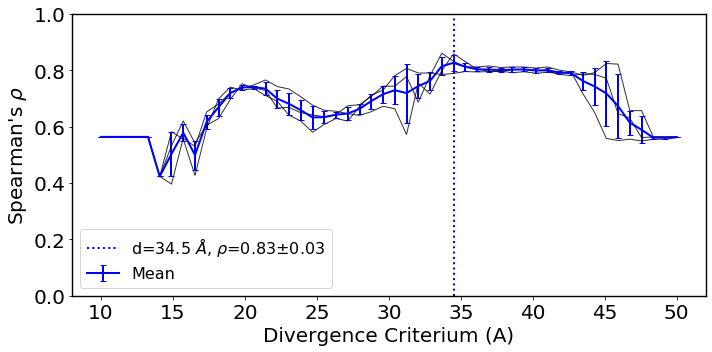

C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


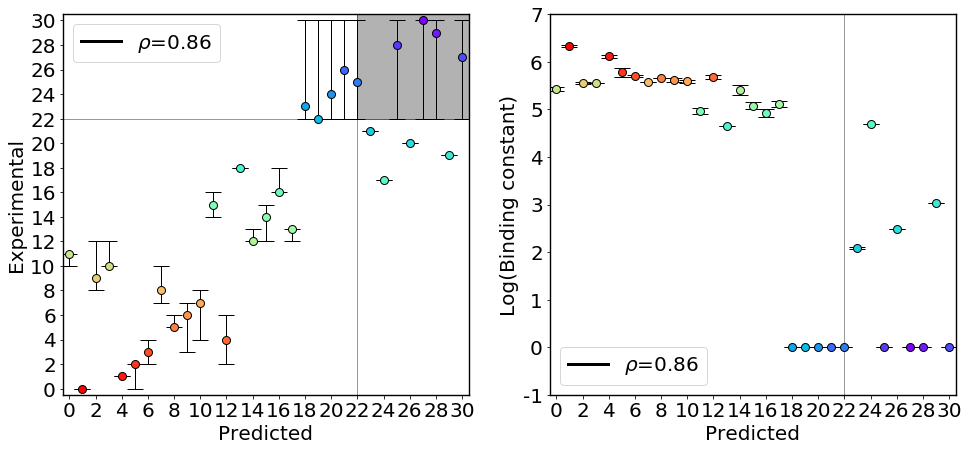

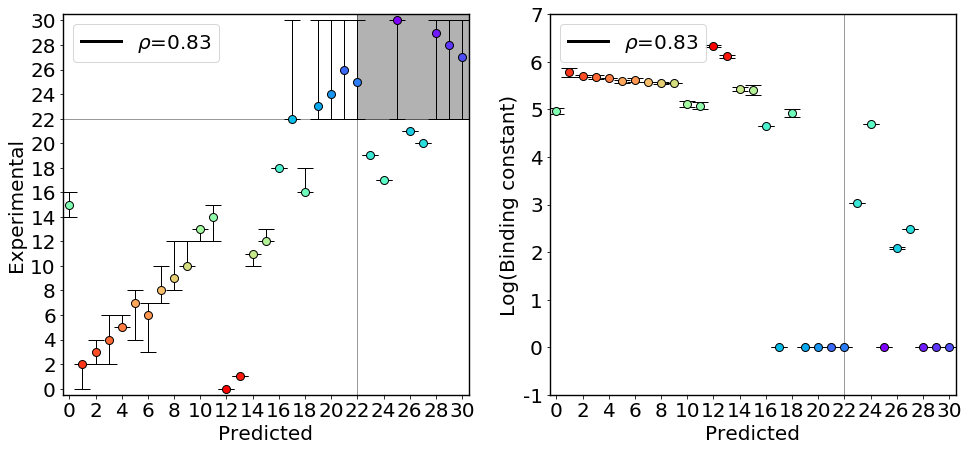

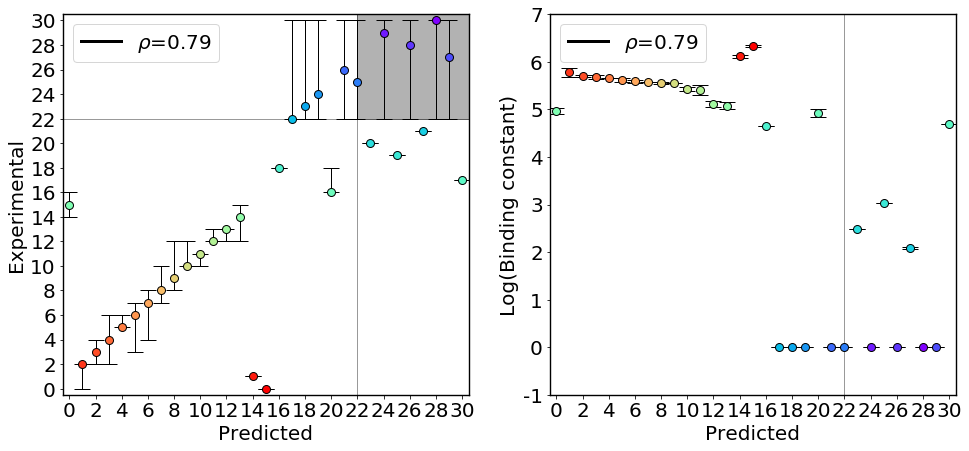

In [13]:
b_sizes = np.linspace(7,10,4, dtype='int')
ref_dists = np.linspace(10,50,50)
ndx_train = np.arange(N)
all_rhos = []
for s in range(len(S)):
    rhos = train(ndx_train, ref_dists, b_sizes=b_sizes, distances=distances[s], ascending=True, figname="Test.png", plot=False)
    all_rhos.append(rhos)

rhos_mean = np.mean(all_rhos, axis=0)
rhos_std = np.std(all_rhos, axis=0)
best_dist = ref_dists[rhos_mean==np.max(rhos_mean)][0]
best_rho = (np.max(rhos_mean), rhos_std[rhos_mean==np.max(rhos_mean)][0])

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
for r, rhos in enumerate(all_rhos):
    ax.plot(ref_dists, rhos, lw=1, color='k', alpha=0.8)
ax.errorbar(ref_dists, rhos_mean, yerr=rhos_std, fmt='-', lw=2, errorevery=1, capsize=3, color='b', label="Mean")
ax.axvline(best_dist, lw=2, ls=":", color='b', label=r"d={:.1f} $\AA$, $\rho$={:.2f}$\pm${:.2f}".format(best_dist, *best_rho))
ax.legend(fontsize=Z-4, loc='lower left')
ax.set_xlabel("Divergence Criterium (A)", fontsize=Z)
ax.set_ylabel(r"Spearman's $\rho$", fontsize=Z)
ax.set_ylim(0,1)
ax.tick_params(labelsize=Z)
plt.tight_layout()
plt.savefig("SingleMDConsensus/Sample.png", format='png', dpi=300)
plt.show()
plt.close()

#Plots best protocols
for s, real_s in enumerate(S):
    best_rank = find_block_distance_com_b_consensed(best_dist, times, distances[s], b_sizes, ascending=True)
    fig, axs = plt.subplots(figsize=(16,7), ncols=2)
    plot_ranking(xdata=np.flip(best_rank), yaxis='rank', a=axs[0]) #np.flip is because plot_ranking ultimately organizes the cmpds from less active to more active
    plot_ranking(xdata=np.flip(best_rank), yaxis='logact', a=axs[1]) #np.flip is because plot_ranking ultimately organizes the cmpds from less active to more active
    plt.savefig("SingleMDConsensus/Top{}_rank.png".format(real_s), format='png', dpi=300)
    plt.show()
    plt.close()

C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


rho(19.0) = 0.75
rho(30.4) = 0.73
rho(31.2) = 0.73
rho(20.6) = 0.76


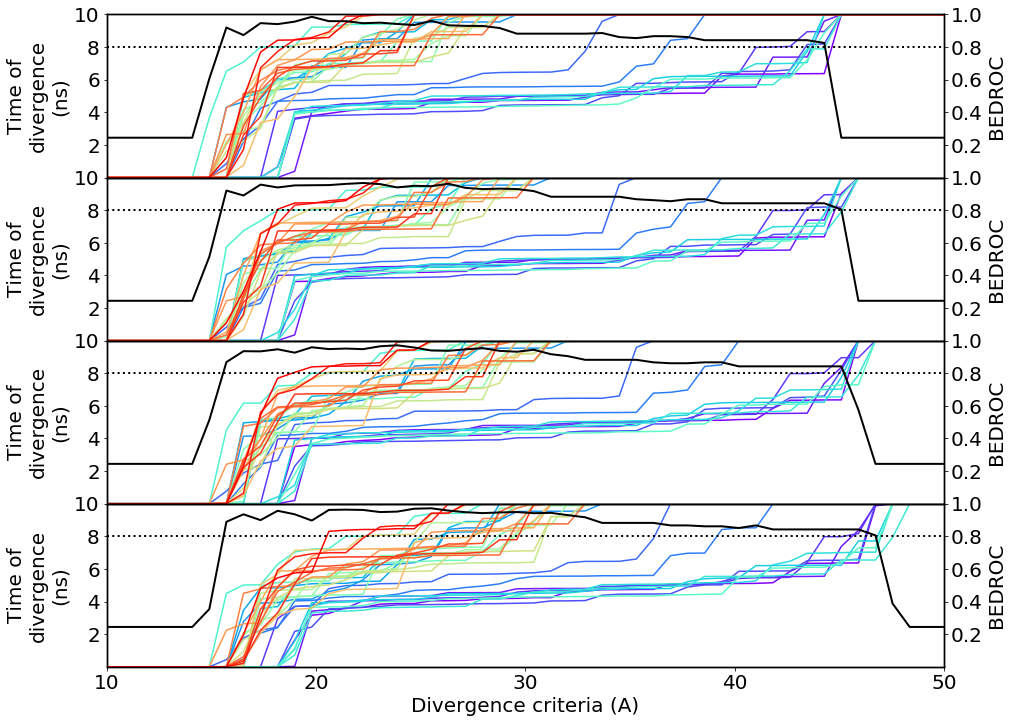

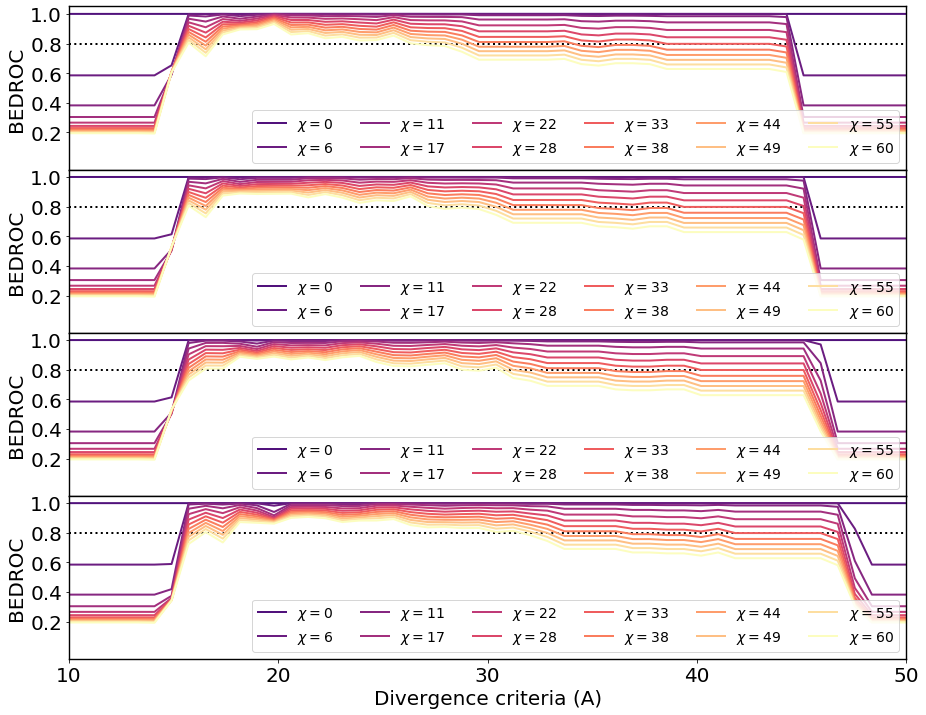

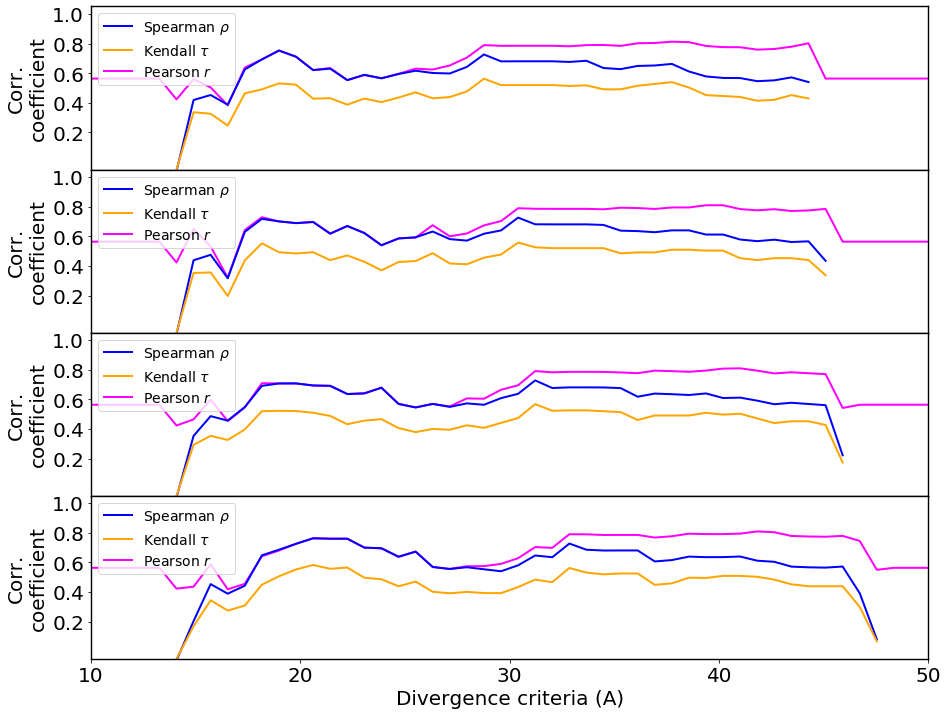

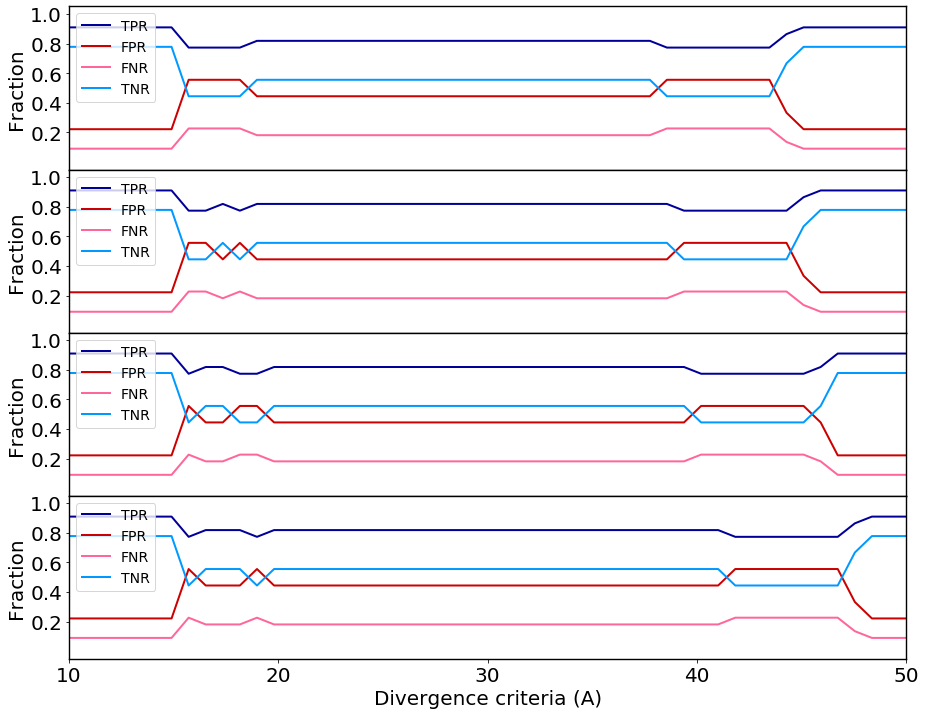

In [12]:
SNDX = 2 #0,1,2 for S31,32,33
SUFFIX = "SingleMDConsensus/S33"
b_sizes = np.linspace(7,10,4, dtype='int')
ref_dists = np.linspace(10,50,50)
ndx_train = np.arange(N)

#Metric information
xticks = np.linspace(min(ref_dists), max(ref_dists), 5, dtype='int')
fig1, axs1 = plt.subplots(figsize=(15,3*len(b_sizes)), sharex=True, ncols=1, nrows=len(b_sizes), gridspec_kw={'hspace':0.0, 'wspace':0.0})
fig2, axs2 = plt.subplots(figsize=(15,3*len(b_sizes)), sharex=True, ncols=1, nrows=len(b_sizes), gridspec_kw={'hspace':0.0, 'wspace':0.0})
fig3, axs3 = plt.subplots(figsize=(15,3*len(b_sizes)), sharex=True, ncols=1, nrows=len(b_sizes), gridspec_kw={'hspace':0.0, 'wspace':0.0})
fig4, axs4 = plt.subplots(figsize=(15,3*len(b_sizes)), sharex=True, ncols=1, nrows=len(b_sizes), gridspec_kw={'hspace':0.0, 'wspace':0.0})
for ax1, ax2, ax3, ax4, b in zip(axs1.flatten(), axs2.flatten(), axs3.flatten(), axs4.flatten(), b_sizes):
    #print("b = {}".format(b))
    plot_metric(find_block_distance_com, ref_dists, [times, distances[SNDX], b, True], reverse_metric=True, 
                a1=ax1, a2=ax2, a3=ax3, a4=ax4,
               xticks1=xticks, xtl1=xticks, xlabel1="Divergence criteria (A)", ylabel1="Time of\ndivergence\n(ns)", yticks1=np.arange(2,10.1, 2), ytl1=np.arange(2,10.1, 2), ylim1=(0,10), a1fmty="%d", a1fmtx="%d",
               xticks2=xticks, xtl2=xticks, xlabel2="Divergence criteria (A)", loc2="lower right", a2fmtx="%d",
               xticks3=xticks, xtl3=xticks, xlabel3="Divergence criteria (A)", loc3="upper left", a3fmtx="%d",
               xticks4=xticks, xtl4=xticks, xlabel4="Divergence criteria (A)", loc4="upper left", a4fmtx="%d")
fig1.savefig(SUFFIX+"_metrics1.png", format='png', dpi=300)
fig2.savefig(SUFFIX+"_metrics2.png", format='png', dpi=300)
fig3.savefig(SUFFIX+"_metrics3.png", format='png', dpi=300)
fig4.savefig(SUFFIX+"_metrics4.png", format='png', dpi=300)
plt.show()
plt.close()

## Blocks from the analytes CLOSEST to com from 1 to 10

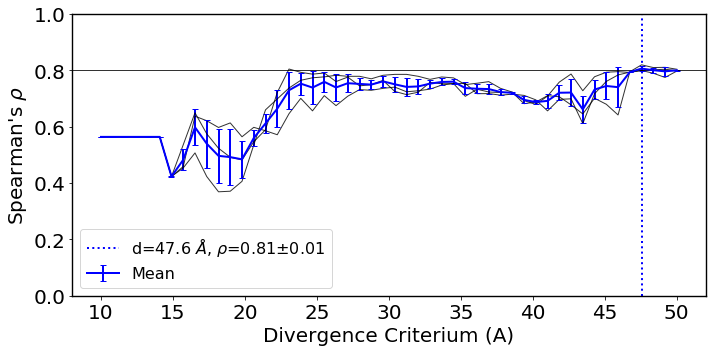

C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


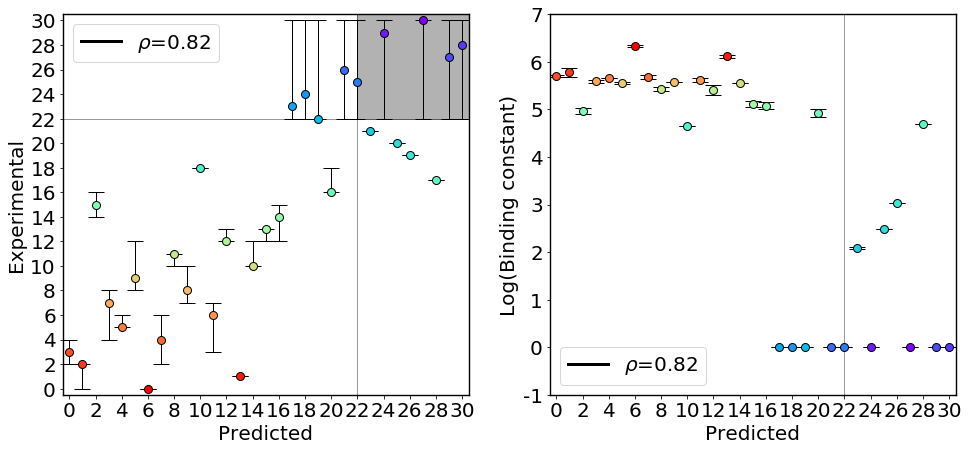

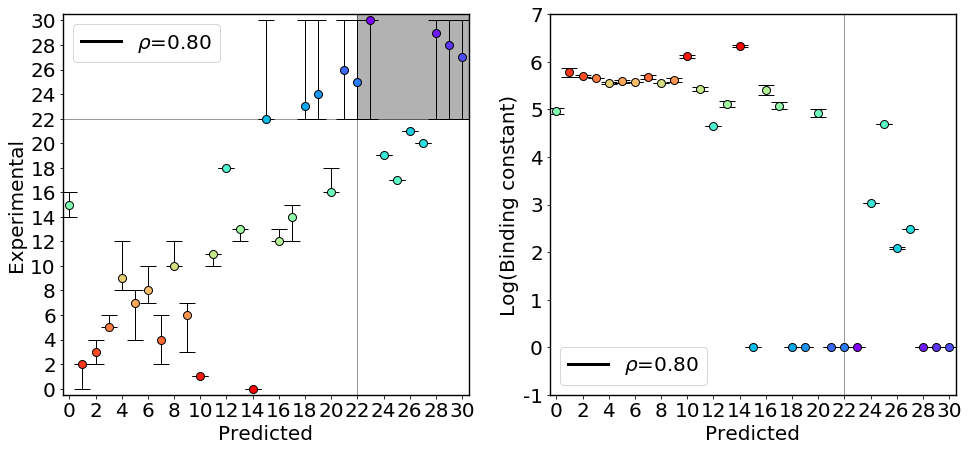

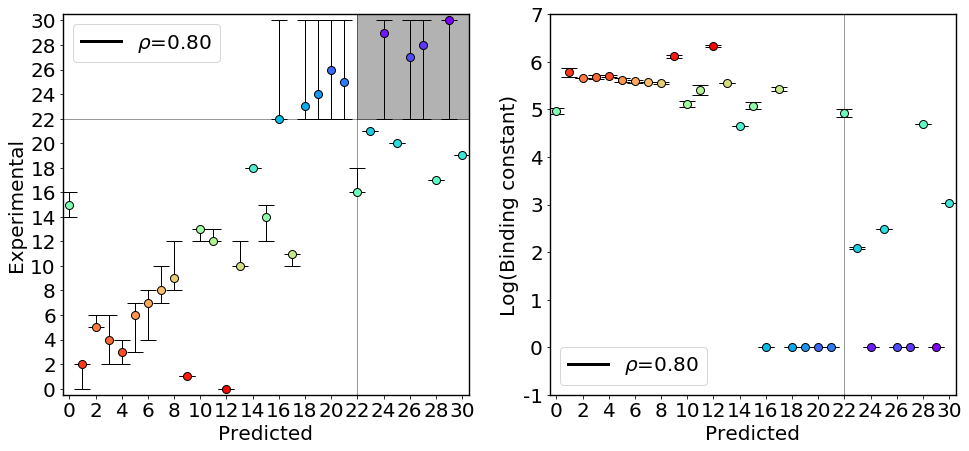

In [13]:
b_sizes = np.linspace(-1,-4,4, dtype='int')
ref_dists = np.linspace(10,50,50)
ndx_train = np.arange(N)
all_rhos = []
for s in range(len(S)):
    rhos = train(ndx_train, ref_dists, b_sizes=b_sizes, distances=distances[s], ascending=False, figname="Test.png", plot=False)
    all_rhos.append(rhos)

rhos_mean = np.mean(all_rhos, axis=0)
rhos_std = np.std(all_rhos, axis=0)
best_dist = ref_dists[rhos_mean==np.max(rhos_mean)][0]
best_rho = (np.max(rhos_mean), rhos_std[rhos_mean==np.max(rhos_mean)][0])

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
for r, rhos in enumerate(all_rhos):
    ax.plot(ref_dists, rhos, lw=1, color='k', alpha=0.8)
ax.errorbar(ref_dists, rhos_mean, yerr=rhos_std, fmt='-', lw=2, errorevery=1, capsize=3, color='b', label="Mean")
ax.axvline(best_dist, lw=2, ls=":", color='b', label=r"d={:.1f} $\AA$, $\rho$={:.2f}$\pm${:.2f}".format(best_dist, *best_rho))
ax.axhline(0.8, lw=0.8, c='k')
ax.legend(fontsize=Z-4, loc='lower left')
ax.set_xlabel("Divergence Criterium (A)", fontsize=Z)
ax.set_ylabel(r"Spearman's $\rho$", fontsize=Z)
ax.set_ylim(0,1)
ax.tick_params(labelsize=Z)
plt.tight_layout()
#plt.savefig(figname, format='png', dpi=300)
plt.show()
plt.close()

"""best_rank = find_block_distance_com_b_consensed(best_dist, times, distances[0], b_sizes, ascending=False)
fig, axs = plt.subplots(figsize=(12,4), ncols=2)
plot_ranking(xdata=np.flip(best_rank), yaxis='rank', a=axs[0], leg=False, xticks=np.arange(0, N, 6, dtype='int')) 
plot_ranking(xdata=np.flip(best_rank), yaxis='logact', a=axs[1], leg=False, yticks=np.arange(-1,7.1,2, dtype='int'), ytl=np.arange(-1,7.1,2, dtype='int'), xtl=np.arange(0, N, 6, dtype='int'), xticks=np.arange(0, N, 6, dtype='int'), ylabel=r"log($K_i$)", xlabel="Predicted rank") 
plt.tight_layout()
plt.savefig("Proposal.png", format='png', dpi=300)
plt.show()
plt.close()"""


#Plots best protocols
for s in range(len(S)):
    best_rank = find_block_distance_com_b_consensed(best_dist, times, distances[s], b_sizes, ascending=False)
    fig, axs = plt.subplots(figsize=(16,7), ncols=2)
    plot_ranking(xdata=np.flip(best_rank), yaxis='rank', a=axs[0]) #np.flip is because plot_ranking ultimately organizes the cmpds from less active to more active
    plot_ranking(xdata=np.flip(best_rank), yaxis='logact', a=axs[1]) #np.flip is because plot_ranking ultimately organizes the cmpds from less active to more active
    #plt.savefig(SUFFIX+"_rank.png", format='png', dpi=300)
    plt.show()
    plt.close()

rho(33.7) = 0.81
rho(31.2) = 0.80
rho(28.0) = 0.80
rho(23.9) = 0.80


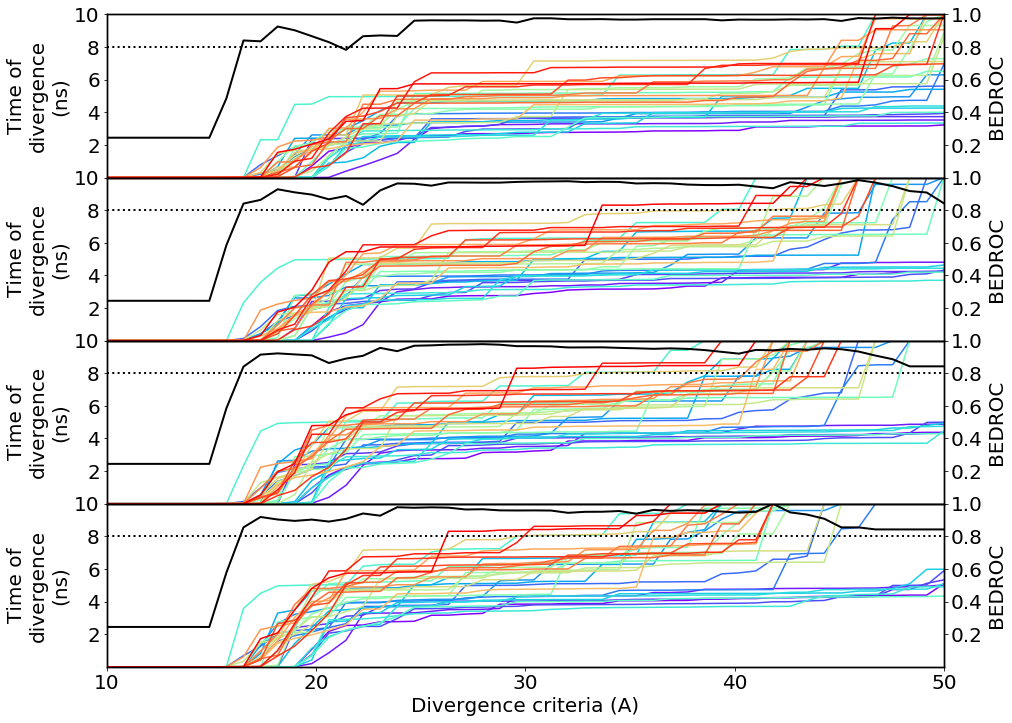

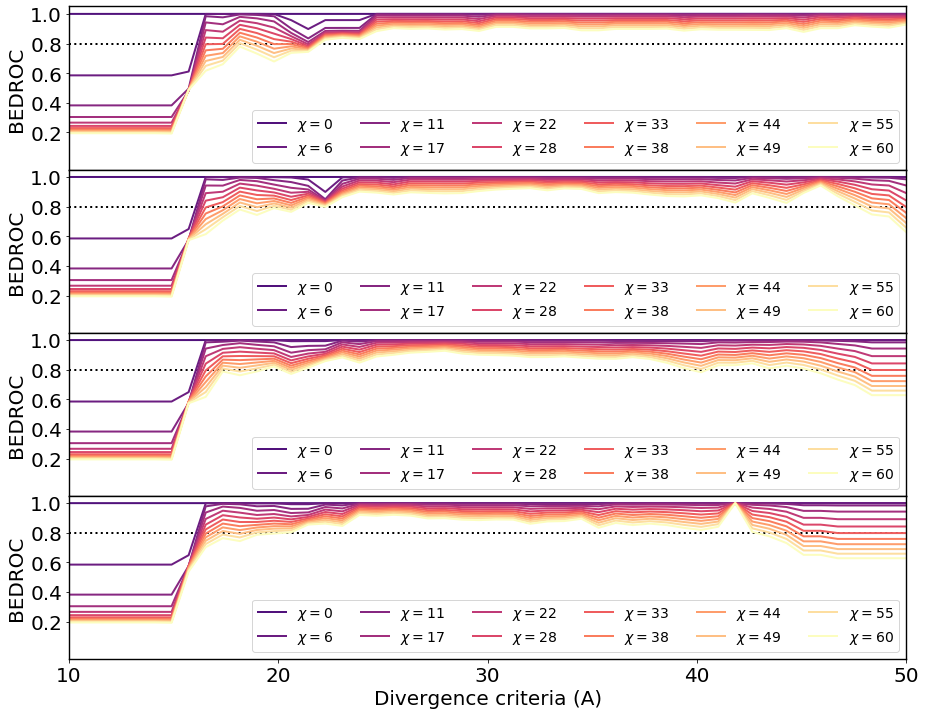

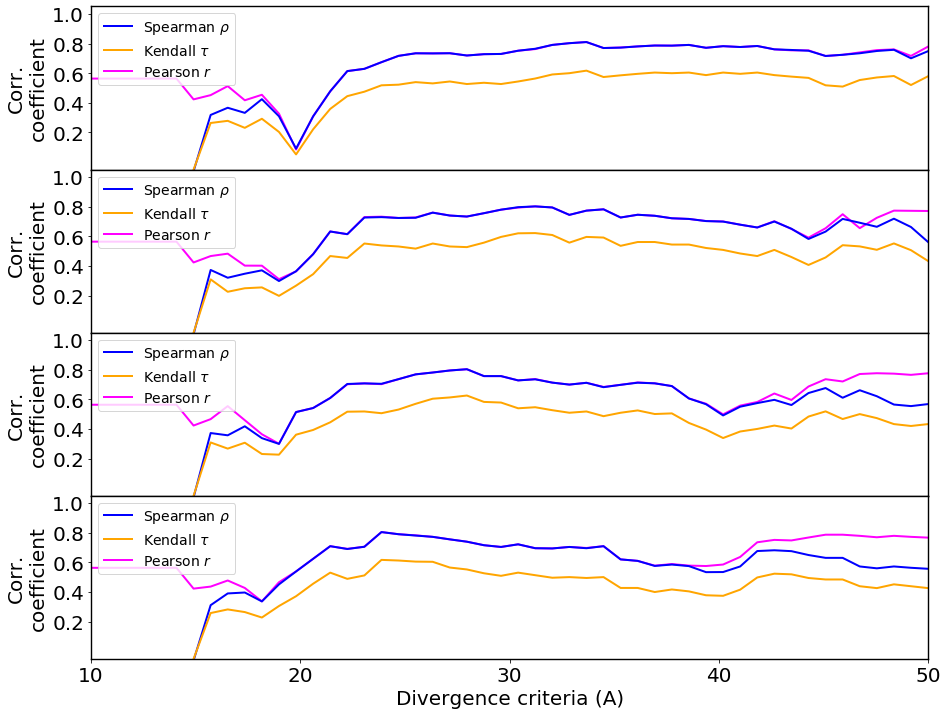

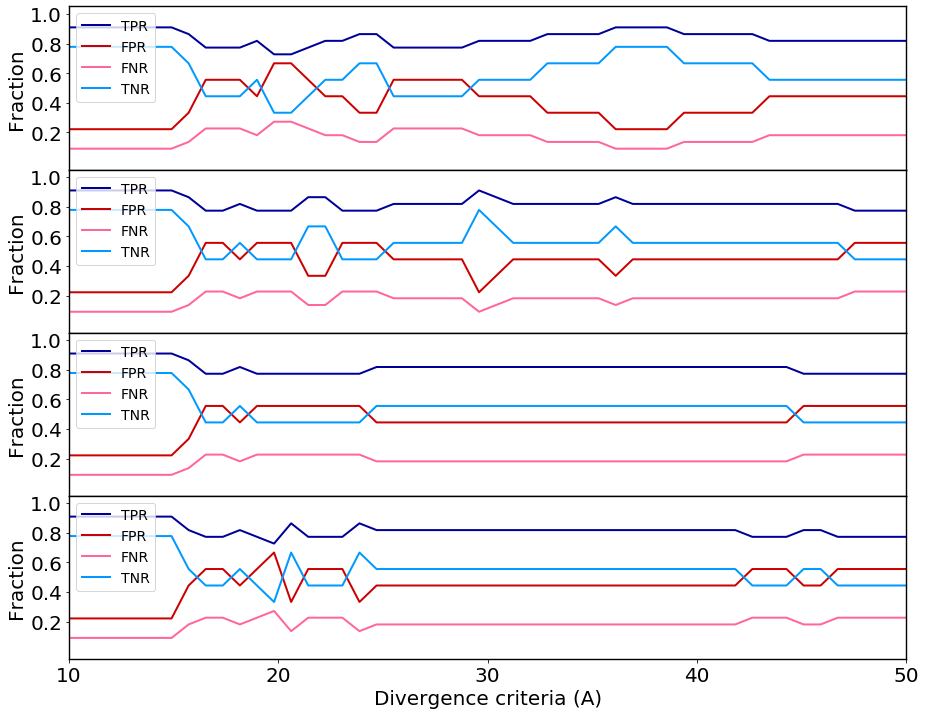

In [14]:
SNDX = 2 #0,1,2 for S31,32,33
SUFFIX = "SingleMDConsensus/S33"
b_sizes = np.linspace(-1,-4,4, dtype='int')
ref_dists = np.linspace(10,50,50)
ndx_train = np.arange(N)

#Metric information
xticks = np.linspace(min(ref_dists), max(ref_dists), 5, dtype='int')
fig1, axs1 = plt.subplots(figsize=(15,3*len(b_sizes)), sharex=True, ncols=1, nrows=len(b_sizes), gridspec_kw={'hspace':0.0, 'wspace':0.0})
fig2, axs2 = plt.subplots(figsize=(15,3*len(b_sizes)), sharex=True, ncols=1, nrows=len(b_sizes), gridspec_kw={'hspace':0.0, 'wspace':0.0})
fig3, axs3 = plt.subplots(figsize=(15,3*len(b_sizes)), sharex=True, ncols=1, nrows=len(b_sizes), gridspec_kw={'hspace':0.0, 'wspace':0.0})
fig4, axs4 = plt.subplots(figsize=(15,3*len(b_sizes)), sharex=True, ncols=1, nrows=len(b_sizes), gridspec_kw={'hspace':0.0, 'wspace':0.0})
for ax1, ax2, ax3, ax4, b in zip(axs1.flatten(), axs2.flatten(), axs3.flatten(), axs4.flatten(), b_sizes):
    #print("b = {}".format(b))
    plot_metric(find_block_distance_com, ref_dists, [times, distances[SNDX], b, False], reverse_metric=True, 
                a1=ax1, a2=ax2, a3=ax3, a4=ax4,
               xticks1=xticks, xtl1=xticks, xlabel1="Divergence criteria (A)", ylabel1="Time of\ndivergence\n(ns)", yticks1=np.arange(2,10.1, 2), ytl1=np.arange(2,10.1, 2), ylim1=(0,10), a1fmty="%d", a1fmtx="%d",
               xticks2=xticks, xtl2=xticks, xlabel2="Divergence criteria (A)", loc2="lower right", a2fmtx="%d",
               xticks3=xticks, xtl3=xticks, xlabel3="Divergence criteria (A)", loc3="upper left", a3fmtx="%d",
               xticks4=xticks, xtl4=xticks, xlabel4="Divergence criteria (A)", loc4="upper left", a4fmtx="%d")
fig1.savefig(SUFFIX+"_metrics1.png", format='png', dpi=300)
fig2.savefig(SUFFIX+"_metrics2.png", format='png', dpi=300)
fig3.savefig(SUFFIX+"_metrics3.png", format='png', dpi=300)
fig4.savefig(SUFFIX+"_metrics4.png", format='png', dpi=300)
plt.show()
plt.close()

C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


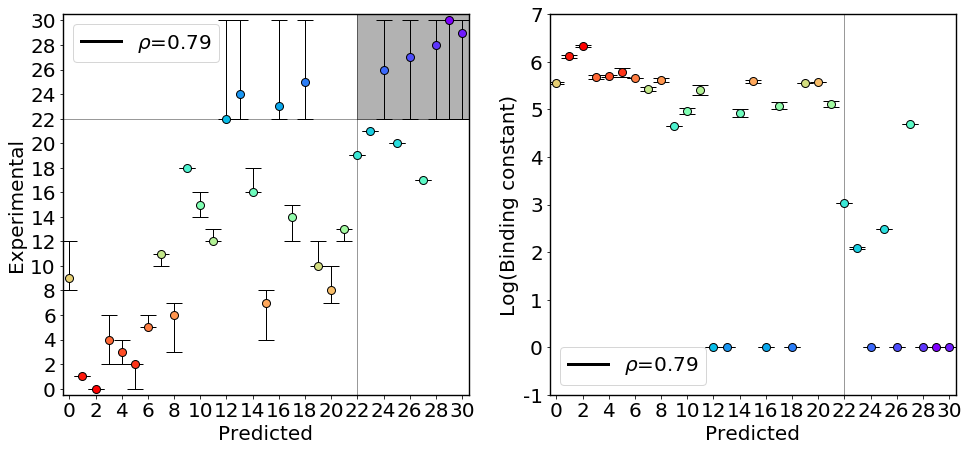

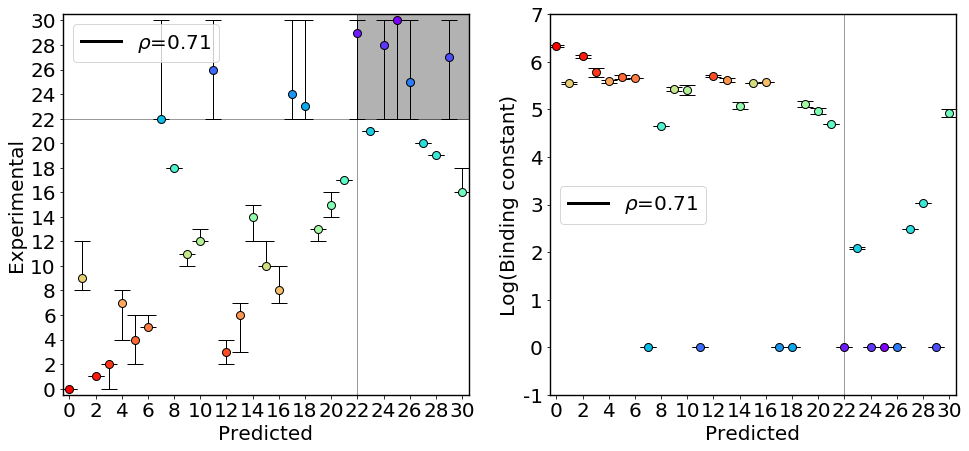

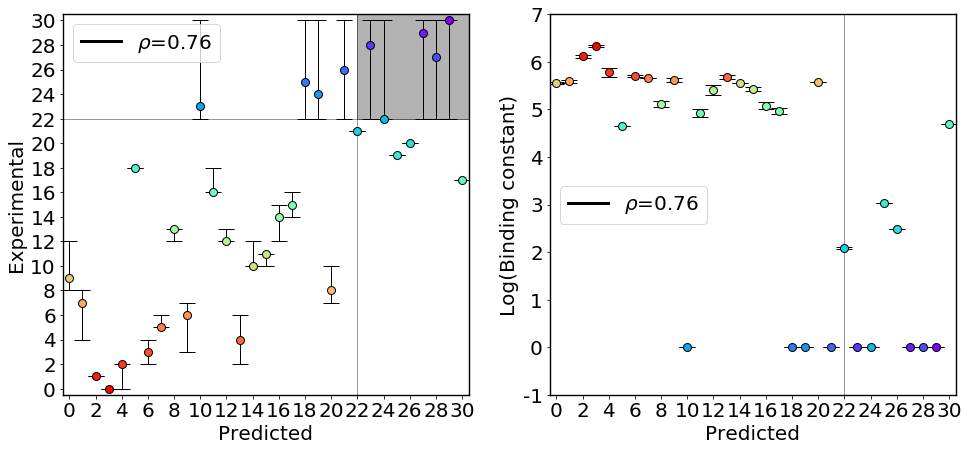

In [15]:
DIST = 30
#Plots best protocols
for s in range(len(S)):
    best_rank = find_block_distance_com_b_consensed(24, times, distances[s], b_sizes, ascending=False)
    fig, axs = plt.subplots(figsize=(16,7), ncols=2)
    plot_ranking(xdata=np.flip(best_rank), yaxis='rank', a=axs[0]) #np.flip is because plot_ranking ultimately organizes the cmpds from less active to more active
    plot_ranking(xdata=np.flip(best_rank), yaxis='logact', a=axs[1]) #np.flip is because plot_ranking ultimately organizes the cmpds from less active to more active
    #plt.savefig(SUFFIX+"_rank.png", format='png', dpi=300)
    plt.show()
    plt.close()